<a href="https://colab.research.google.com/github/EsraaMosaad/TECHNOHACKS-EDUTECH/blob/main/Task_4_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import argmax
import tarfile
import pickle

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Load dataset**

Reference

[Learning Multiple Layers of Features from Tiny Images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.

In [ ]:
# Specify the path to your .tar file
file_path = '/content/drive/MyDrive/Dataset/cifar-10-python.tar'

# Open the .tar file
with tarfile.open(file_path, 'r') as tar:
    # Extract all contents of the .tar file
    tar.extractall()

In [ ]:
data_file = 'cifar-10-batches-py/data_batch_1'
# Load the CIFAR-10 data file
with open(data_file, 'rb') as f:
    data = pickle.load(f, encoding='bytes')
data.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [ ]:
import os
import pickle

# Specify the path to the directory containing the CIFAR-10 dataset files
dataset_dir = 'cifar-10-batches-py'

# Load all CIFAR-10 data batches
data = []
labels = []
for filename in os.listdir(dataset_dir):
    if filename.startswith('data_batch_'):
        file_path = os.path.join(dataset_dir, filename)
        with open(file_path, 'rb') as f:
            batch_data = pickle.load(f, encoding='bytes')
            data.append(batch_data[b'data'])
            labels.append(batch_data[b'labels'])

# # Access the data
# for batch_data in data:
#     # Process the batch_data as needed
#     # ...

In [ ]:
data = np.asarray(data)
x_train=data.reshape((-1,3072))
x_train.shape

(50000, 3072)

In [ ]:
labels=np.asarray(labels)
y_train=labels.reshape((-1,1))
y_train.shape

(50000, 1)

In [ ]:
test_file='/content/cifar-10-batches-py/test_batch'

with open(test_file, 'rb') as f:
    test = pickle.load(f, encoding='bytes')

test.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [ ]:
test_data=test[b'data']
test_data.shape

(10000, 3072)

In [ ]:
y_test=np.asarray(test[b'labels'])
y_test.shape

(10000,)

# **Data preprossing**

In [ ]:
x_train[0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

Normalize image pixel values.

In [ ]:
x_train = x_train / 255
x_test = test_data / 255
x_train[0]

array([0.23137255, 0.16862745, 0.19607843, ..., 0.54901961, 0.32941176,
       0.28235294])

# **Neural network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1024,input_shape=(3072,), activation="relu"))
model.add(Dense(520,input_shape=(1024,), activation="relu"))
model.add(Dense(10,input_shape=(520,), activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 520)               533000    
                                                                 
 dense_2 (Dense)             (None, 10)                5210      
                                                                 
Total params: 3684962 (14.06 MB)
Trainable params: 3684962 (14.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='RMSprop',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
results=model.fit(
  x=x_train,
  y=y_train,
  shuffle=True,
  epochs=30,
  validation_data=(x_test,y_test)
)

Epoch 1/30
1563/1563 [==============================] - 73s 46ms/step - loss: 1.9402 - accuracy: 0.3126 - val_loss: 1.8091 - val_accuracy: 0.3441
Epoch 2/30
1563/1563 [==============================] - 71s 46ms/step - loss: 1.6946 - accuracy: 0.3934 - val_loss: 1.6369 - val_accuracy: 0.4134
Epoch 3/30
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6298 - accuracy: 0.4185 - val_loss: 1.8022 - val_accuracy: 0.4021
Epoch 4/30
1563/1563 [==============================] - 75s 48ms/step - loss: 1.5908 - accuracy: 0.4316 - val_loss: 1.6477 - val_accuracy: 0.4249
Epoch 5/30
1563/1563 [==============================] - 75s 48ms/step - loss: 1.5687 - accuracy: 0.4433 - val_loss: 1.7630 - val_accuracy: 0.3932
Epoch 6/30
1563/1563 [==============================] - 75s 48ms/step - loss: 1.5541 - accuracy: 0.4513 - val_loss: 1.6393 - val_accuracy: 0.4207
Epoch 7/30
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5471 - accuracy: 0.4537 - val_loss: 1.6158 -

Text(0, 0.5, 'losses')

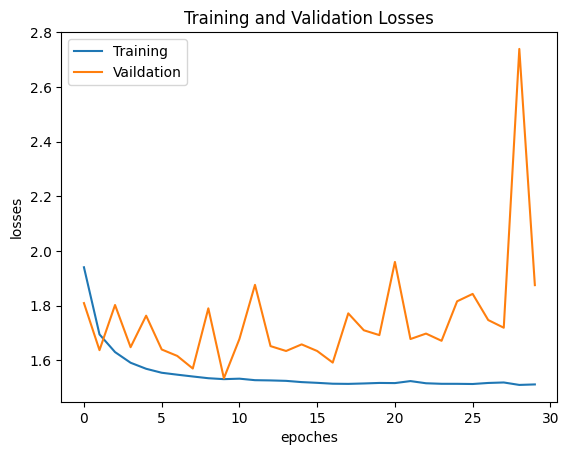

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

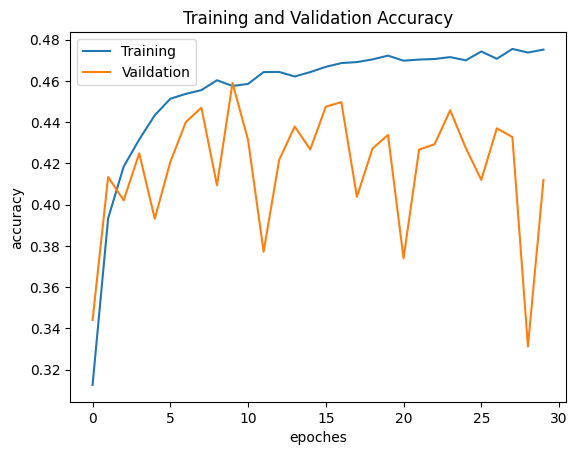

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [ ]:
pred=model.predict(x_test)
pred[0:3]

313/313 [==============================] - 3s 10ms/step


array([[9.6820801e-02, 4.7824297e-02, 6.0914982e-02, 2.2616436e-01,
        1.8938595e-01, 1.5262702e-01, 9.2251286e-02, 4.0122360e-02,
        7.8347035e-02, 1.5541891e-02],
       [6.2129064e-03, 3.9488360e-01, 4.7679951e-05, 4.5206405e-05,
        7.1574409e-06, 4.5474644e-06, 4.1652561e-07, 4.8648899e-06,
        8.6736143e-02, 5.1205742e-01],
       [1.8107500e-02, 4.1407570e-01, 9.0217299e-04, 3.0715737e-04,
        1.0242471e-04, 9.2862192e-06, 1.0614041e-08, 3.5318013e-04,
        7.3557481e-02, 4.9258503e-01]], dtype=float32)

In [ ]:
from numpy import argmax
y_pred=argmax(pred,axis=1)
y_pred[0:3]

array([3, 9, 9])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[336  13  54  19  27  12   8  23  56  11]
 [161 738  72  80  57  65  71  65 184 306]
 [ 13   3  76  16  15  17   7   8   4   2]
 [ 34   9 132 310  69 222 134  51  11  16]
 [ 63  17 297 120 479  99 220 106  43  13]
 [ 13   8  63 152  30 274  70  41  18   5]
 [ 13   9  76  83  82  55 363  19   4  14]
 [ 49  25 129  91 160 152  45 517   9  38]
 [151  29  28  28  27  33  22  15 459  27]
 [167 149  73 101  54  71  60 155 212 568]]
0.412


# **CNN**

In [ ]:
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten

In [ ]:
cnn_x_train = x_train.reshape(-1,32,32,3)
cnn_x_test = x_test.reshape(-1,32,32,3)
cnn_x_train.shape

(50000, 32, 32, 3)

In [ ]:
CNN_model=Sequential() #Create a network sequence.

CNN_model.add(Input(shape=(32,32,3)))
CNN_model.add(Conv2D(32, (3, 3), padding='same',activation='relu'))
CNN_model.add(Conv2D(32, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.30))
CNN_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Flatten())
CNN_model.add(Dense(512, activation='relu'))
CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(10, activation='softmax'))

CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [ ]:
CNN_model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
cnn_results= CNN_model.fit(cnn_x_train,y_train,epochs=55,batch_size=64,validation_data=(cnn_x_test, y_test))

Epoch 1/55
782/782 [==============================] - 247s 313ms/step - loss: 1.8375 - accuracy: 0.3155 - val_loss: 1.5909 - val_accuracy: 0.4119
Epoch 2/55
782/782 [==============================] - 253s 324ms/step - loss: 1.5766 - accuracy: 0.4218 - val_loss: 1.4789 - val_accuracy: 0.4663
Epoch 3/55
782/782 [==============================] - 253s 324ms/step - loss: 1.4580 - accuracy: 0.4693 - val_loss: 1.3482 - val_accuracy: 0.5147
Epoch 4/55
782/782 [==============================] - 256s 328ms/step - loss: 1.3663 - accuracy: 0.5056 - val_loss: 1.2723 - val_accuracy: 0.5433
Epoch 5/55
782/782 [==============================] - 253s 324ms/step - loss: 1.3048 - accuracy: 0.5304 - val_loss: 1.2452 - val_accuracy: 0.5563
Epoch 6/55
782/782 [==============================] - 253s 324ms/step - loss: 1.2642 - accuracy: 0.5481 - val_loss: 1.1921 - val_accuracy: 0.5785
Epoch 7/55
782/782 [==============================] - 253s 324ms/step - loss: 1.2259 - accuracy: 0.5626 - val_loss: 1.1747 -

Text(0, 0.5, 'losses')

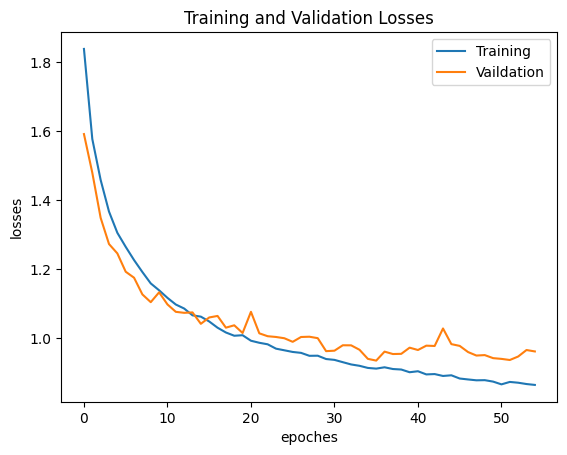

In [ ]:
plt.plot(cnn_results.history['loss'])
plt.plot(cnn_results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

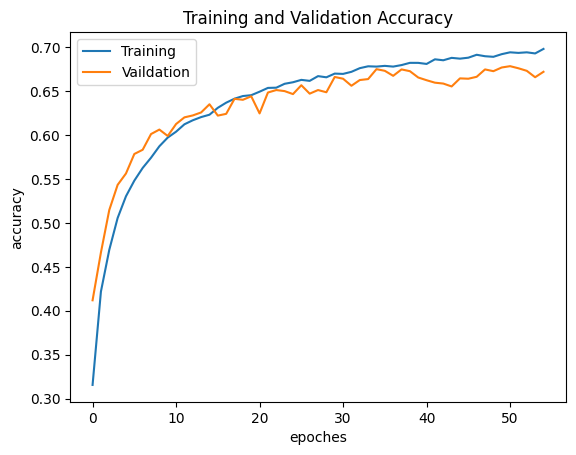

In [ ]:
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [ ]:
cnn_pred=CNN_model.predict(cnn_x_test)
cnn_pred[0:3]

313/313 [==============================] - 12s 39ms/step


array([[1.09598134e-03, 7.77946785e-02, 1.24135604e-02, 3.30522835e-01,
        7.37154949e-03, 3.36212844e-01, 1.86829492e-01, 4.19331621e-03,
        1.60659123e-02, 2.74997447e-02],
       [1.98199414e-02, 2.16021971e-03, 1.00281984e-04, 2.58249725e-04,
        3.79499907e-05, 3.04216646e-05, 1.85064455e-05, 1.93035048e-05,
        9.76716518e-01, 8.38512031e-04],
       [1.37421131e-01, 7.94484392e-02, 1.12582976e-03, 1.28400640e-03,
        1.60780381e-02, 3.42654064e-04, 5.33389277e-04, 9.17481375e-04,
        7.13556409e-01, 4.92925420e-02]], dtype=float32)

In [ ]:
cnn_y_pred=argmax(cnn_pred,axis=1)
cnn_y_pred[0:3]

array([5, 8, 8])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(cnn_y_pred,y_test))
print(accuracy_score(cnn_y_pred,y_test))

[[674   6  57  16  11   7   4   6  49  27]
 [ 17 747  10  11   4   5  10   2  35  46]
 [ 56   4 388  38  37  17   8   6   8   3]
 [ 25  13 119 515  55 248  84  45  18  19]
 [ 43   7 178 105 684  84  42  68  22   6]
 [ 10   5  74 110  22 505  27  57   9   9]
 [ 19   9 103  90  73  46 793  12   3   5]
 [ 17   1  36  41  98  61   6 763   6  13]
 [ 79  20  12  16   5  12   7   3 802  22]
 [ 60 188  23  58  11  15  19  38  48 850]]
0.6721
